In [ ]:
#check goldfinger and goldeneye.
#why is bond not protagonist?
#kaggle data is not reliable in terms of character importance, need another method to select protagonists

from llm_annotate import chunk_text, annotate, custom_openai
import pandas as pd
import os

In [ ]:
#load kaggle data
kaggle_data = pd.read_csv("data/kaggle_data.csv")

In [ ]:
repeat_chunking = False
if repeat_chunking:
    for fn in kaggle_data.script_filename:
        with open(f"data/screenplay_data/data/raw_texts/raw_texts/{fn}", "r", encoding="utf-8") as f:
            try:
                script = f.read()
            except Exception as e:
                try:
                    with open(f"data/screenplay_data/data/raw_texts/raw_texts/{fn}", "r", encoding="iso-8859-1") as f:
                        script = f.read()
                except Exception as e2:
                    print(f"again Error reading {fn}: {e2}")
                    raise e2
        chunk_text(script, outputfile=f"data/chunks/{fn.replace('.txt', '.json')}", verbose=False)

In [14]:
traits= {
    "warmth": {
        "trait_explanation": "A character’s warmth refers to their tendency to be good-natured, trustworthy, tolerant, friendly, and sincere. ",
        "positive_examples": "Organizes a get-together, admits to insecurity.",
        "negative_examples": "Rejects someone, boasts."
    },
    "competence": {
        "trait_explanation": "A character’s competence refers to their tendency to behave capably, skillfully, intelligently, and confidently.",
        "positive_examples": "Wins something, takes a calculated risk.",
        "negative_examples": "Embarrasses themselves, fails to understand something."
    }
}

In [5]:
# for i in range(10): #kaggle_data.shape[0]
#     #if annotation file exists, skip
#     current_file = kaggle_data.script_filename.iloc[i]
#     if os.path.exists(f"data/annotations/{current_file.replace('.txt', '.json')}"):
#         continue
#     print(f"{i+1}/{kaggle_data.shape[0]}")
#     title = kaggle_data.title.iloc[i]
#     protagonist = kaggle_data.character_name.iloc[i]
#     annotate(chunkfile=f"data/chunks/{current_file.replace('.txt', '.json')}", outputfile=f"data/annotations/{current_file.replace('.txt', '.json')}", book_title=title, traits=traits, target_characters=[protagonist], model="gpt-4.1-mini")

In [15]:
def annotate_one(i):
    current_file = kaggle_data.script_filename.iloc[i]
    out_path = f"data/annotations/{current_file.replace('.txt', '.json')}"
    if os.path.exists(out_path):
        return f"Skipped {current_file}"
    print(f"{i+1}/{kaggle_data.shape[0]}")
    title = kaggle_data.title.iloc[i]
    protagonist = kaggle_data.character_name.iloc[i]
    annotate(
        chunkfile=f"data/chunks/{current_file.replace('.txt', '.json')}",
        outputfile=out_path,
        book_title=title,
        traits=traits,
        target_characters=[protagonist],
        model="gpt-4.1-mini"
    )
    return f"Done {current_file}"

In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor, as_completed
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(annotate_one, i) for i in range(710)]  # or range(kaggle_data.shape[0])
    for future in as_completed(futures):
        print(future.result())

Skipped A Monster Calls_3416532.txt
Skipped A Mighty Heart_0829459.txt
Skipped A History of Violence_0399146.txt
Skipped A Hard Day s Night_0058182.txt
Skipped A Goofy Movie_0113198.txt
Skipped A Good Year_0401445.txt
Skipped American Gangster_0765429.txt
Skipped A Fish Called Wanda_0095159.txt
Skipped American Bully_1169133.txt
Skipped American Beauty_0169547.txt
Skipped A Fantastic Woman_5639354.txt
Skipped American Animals_6212478.txt
Skipped A Dry White Season_0097243.txt
Skipped Amelia_1129445.txt
Skipped A Death in the Gunj_5918074.txt
Skipped 17 Again_0974661.txt
Skipped Amadeus_0086879.txt
Skipped A Dangerous Method_1571222.txt
Skipped Altered States_0080360.txt
Skipped A Clockwork Orange_0066921.txt
Skipped Alone in the Dark_0369226.txt
Skipped A Christmas Story_0085334.txt
Skipped Almost Famous_0181875.txt
Skipped A Christmas Carol_0044008.txt
Skipped All the Money in the World_5294550.txt
Skipped A Bucket of Blood_0112594.txt
Skipped All the King s Men_0041113.txt
Skipped A 

In [11]:
from llm_annotate import score_annotations

score_annotations(annotation_file="data/annotations/10 Things I Hate About You_0147800.json", chunkfile = "data/chunks/10 Things I Hate About You_0147800.json", outputfile="trash.jsonl")

Scoring 100 out of 281 total annotations.
Found existing output file: trash.jsonl
Resuming from annotation 23 of 100


: 

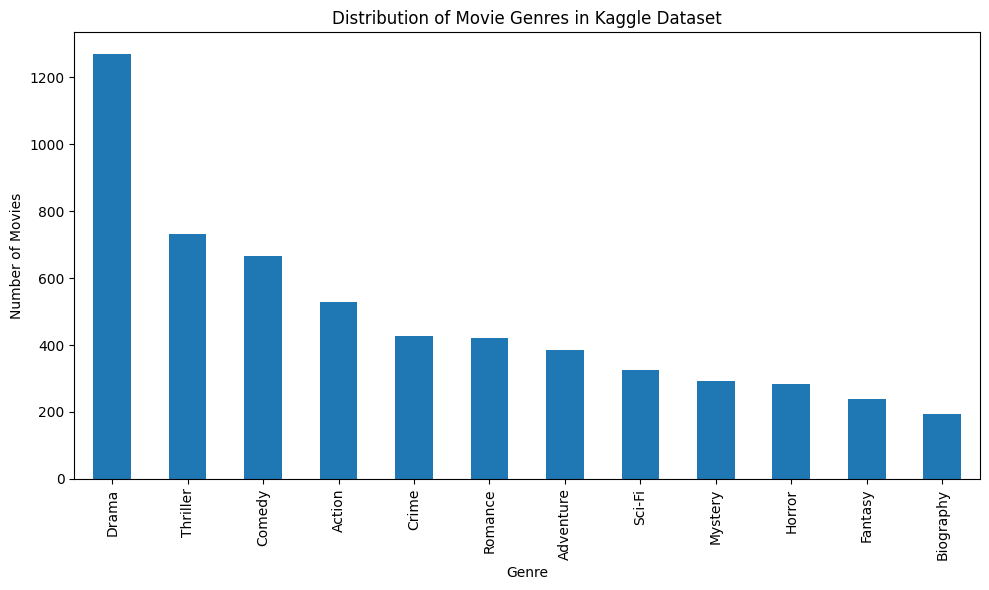

In [10]:
#PLOT DISTRIBUTION OF binary columns Drama,Thriller,Comedy,Action,Crime,Romance,Adventure,Sci-Fi,Mystery,Horror,Fantasy,Biography
import matplotlib.pyplot as plt
genre_cols = ["Drama","Thriller","Comedy","Action","Crime","Romance","Adventure","Sci-Fi","Mystery","Horror","Fantasy","Biography"]
genre_counts = kaggle_data[genre_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title("Distribution of Movie Genres in Kaggle Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.tight_layout()
